In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)  = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

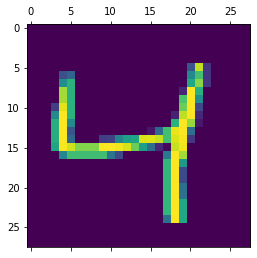

In [5]:
plt.matshow(X_train[2])

In [6]:
y_train[2]

4

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
x_train_flatten = X_train.reshape(len(X_train),28*28)
x_test_flatten = X_test.reshape(len(X_test),28*28)

In [9]:
model = keras.Sequential([
    #applying the hidden layer
    keras.layers.Dense(784,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1899 - accuracy: 0.9434
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9840
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0257 - accuracy: 0.9918


In [10]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9804


[0.06760337203741074, 0.980400025844574]

In [11]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

array([1.4671087e-03, 6.6167116e-04, 2.0406842e-03, 5.3878820e-01,
       3.3508260e-07, 6.1712934e-05, 2.5285028e-06, 9.9999636e-01,
       2.5022030e-04, 1.2005469e-01], dtype=float32)

In [12]:
np.argmax(y_predicted[0])

7

In [13]:
y_test[0]

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

7

<AxesSubplot:>

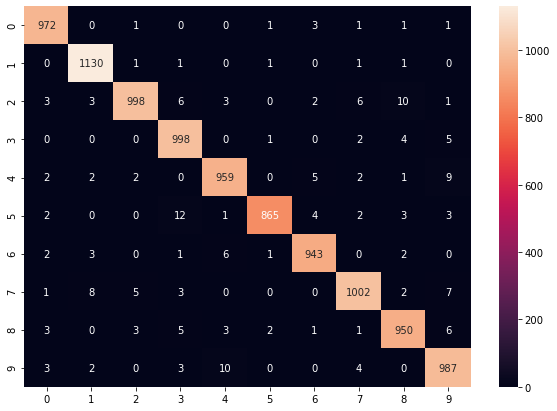

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt = 'd')


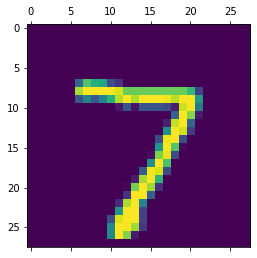

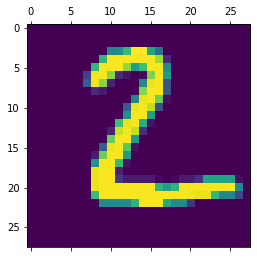

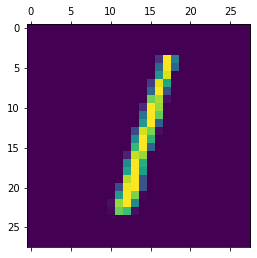

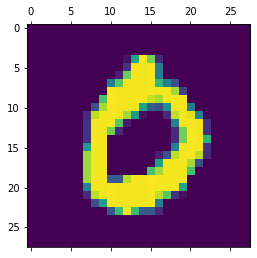

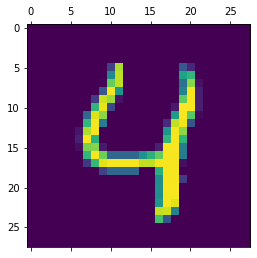

In [16]:
for i in range(5):
    plt.matshow(X_test[i])

In [17]:
y_predicted_labels[3]

0